# Application 2

## Membres du groupe


1.   GUIDIBI Teddy
2.   JALAL Alaeddine
3.   KHATIB Asmaa
4.   MONKOUN Aris
5.   ROUDRI Chaimae

## DataSet en forme de croissant

### Génération

In [1]:
from sklearn.datasets import make_moons

n_samples = 1000
X, y = make_moons(n_samples, noise=0.03, random_state=42)

In [2]:
import pandas as pd
moons = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
moons.head(5)

,X1,X2,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0


In [3]:
moons.label.value_counts()

1    500
0    500
Name: label, dtype: int64

### Visualisation

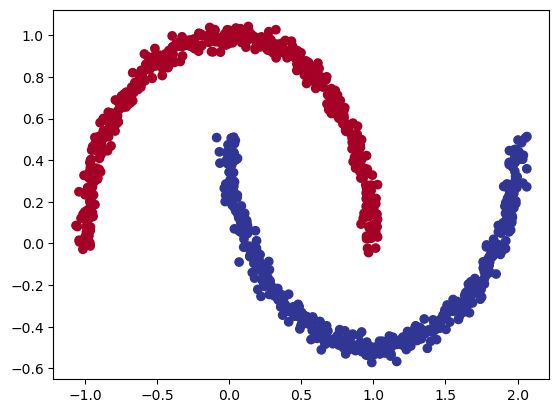

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu);

### Conversion des données en tenseurs

In [5]:
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [6]:
X[:4], y[:4]

(tensor([[-0.0093,  0.3910],
         [ 0.9546, -0.4738],
         [ 0.9185, -0.4252],
         [ 0.4128, -0.3764]]),
 tensor([1., 1., 1., 1.]))

### Splitting 80% train et 20% test

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modèle

### Définition des couches

In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [13]:
class MoonsModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=200)
        self.layer_2 = nn.Linear(in_features=200, out_features=100)
        self.layer_3 = nn.Linear(in_features=100, out_features=20)
        self.layer_4 = nn.Linear(in_features=20, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
       return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))

model_ = MoonsModel()
print(model_)

MoonsModel(
  (layer_1): Linear(in_features=2, out_features=200, bias=True)
  (layer_2): Linear(in_features=200, out_features=100, bias=True)
  (layer_3): Linear(in_features=100, out_features=20, bias=True)
  (layer_4): Linear(in_features=20, out_features=1, bias=True)
  (relu): ReLU()
)


### Fonction loss

In [14]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_.parameters(), lr=0.1)

### Accuracy

In [15]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100 
    return acc

### Train loop

In [16]:
torch.manual_seed(42)
epochs = 1000


for epoch in range(epochs):
    y_logits = model_(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Test
    model_.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train - Loss : {loss:.5f}, Acc: {acc:.2f}% | Test - Loss: {test_loss:.5f}, Acc: {test_acc:.2f}%")

Epoch: 0 | Train - Loss : 0.69517, Acc: 50.00% | Test - Loss: 0.69199, Acc: 50.00%
Epoch: 100 | Train - Loss : 0.20169, Acc: 90.75% | Test - Loss: 0.19894, Acc: 91.50%
Epoch: 200 | Train - Loss : 0.06666, Acc: 98.38% | Test - Loss: 0.06134, Acc: 98.50%
Epoch: 300 | Train - Loss : 0.01673, Acc: 100.00% | Test - Loss: 0.01466, Acc: 100.00%
Epoch: 400 | Train - Loss : 0.00725, Acc: 100.00% | Test - Loss: 0.00625, Acc: 100.00%
Epoch: 500 | Train - Loss : 0.00425, Acc: 100.00% | Test - Loss: 0.00364, Acc: 100.00%
Epoch: 600 | Train - Loss : 0.00290, Acc: 100.00% | Test - Loss: 0.00247, Acc: 100.00%
Epoch: 700 | Train - Loss : 0.00215, Acc: 100.00% | Test - Loss: 0.00184, Acc: 100.00%
Epoch: 800 | Train - Loss : 0.00169, Acc: 100.00% | Test - Loss: 0.00144, Acc: 100.00%
Epoch: 900 | Train - Loss : 0.00138, Acc: 100.00% | Test - Loss: 0.00118, Acc: 100.00%


### Evaluation et Prédiction

In [17]:
model_.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_(X_test))).squeeze()
y_preds[:10], y[:10] 

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

### Visualisation

In [18]:
from helper_functions import plot_predictions, plot_decision_boundary

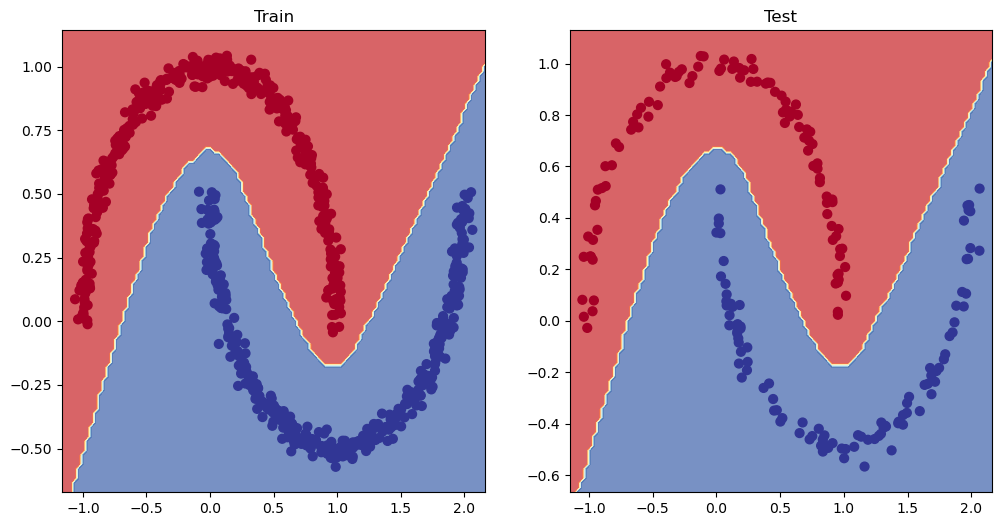

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_, X_test, y_test)